<a href="https://colab.research.google.com/github/marabaso/ie423/blob/main/task6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 6

## Initialize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/blackfriday/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Getting rid of the missing data.

In [6]:
df.dropna(inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [7]:
frequencies = {col: df[col].value_counts() for col in df.columns}

# Display frequencies
for col, freq in frequencies.items():
    print(f"Frequencies for column {col}:\n{freq}\n")


Frequencies for column User_ID:
User_ID
1001941    219
1004277    209
1001680    208
1004510    208
1000889    205
          ... 
1005784      1
1001967      1
1002819      1
1001416      1
1005391      1
Name: count, Length: 5870, dtype: int64

Frequencies for column Product_ID:
Product_ID
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
             ... 
P00296842       2
P00243042       2
P00027842       1
P00060842       1
P00057842       1
Name: count, Length: 528, dtype: int64

Frequencies for column Gender:
Gender
M    129227
F     37594
Name: count, dtype: int64

Frequencies for column Age:
Age
26-35    66942
36-45    33285
18-25    31316
46-50    13374
51-55    11166
55+       5865
0-17      4873
Name: count, dtype: int64

Frequencies for column Occupation:
Occupation
4     22364
0     20971
7     17802
17    14069
1     13511
12    10482
20     9223
14     8387
2      7541
16     7333
6      5816
3      5015
10     4331
15     3986
5  

In [8]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.668210e+05,166821,166821,166821,166821.000000,166821,166821,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
unique,NaN,528,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00025442,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1615,129227,66942,NaN,69243,58287,NaN,NaN,NaN,NaN,NaN
mean,1.003037e+06,NaN,NaN,NaN,8.178886,NaN,NaN,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1.732907e+03,NaN,NaN,NaN,6.487522,NaN,NaN,0.490470,2.573969,4.500288,4.125338,5082.287959
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001523e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,1.003101e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,1.004480e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,4.000000,10.000000,16.000000,15626.000000


Encoding non-numerical variables (some with mapping and some with OHE):

In [9]:
from sklearn.preprocessing import OneHotEncoder

def extract_numeric(product_id):
    return int(product_id[1:])

# Extracting only number from 'Product_ID'
df['Product_ID'] = df['Product_ID'].apply(extract_numeric)

age_mapping = {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}
stay_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}

# Mapping 'Age' and 'Stay_In_Current_City_Years'
df['Age'] = df['Age'].map(age_mapping)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map(stay_mapping)

# One-hot encoding 'Gender' and 'City_Category'
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

encoded_columns = encoder.fit_transform(df[['Gender', 'City_Category']])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Gender', 'City_Category']))

encoded_columns_df.index = df.index

# Add the encoded columns to the original DataFrame
df = df.drop(['Gender', 'City_Category'], axis=1)
df = df.join(encoded_columns_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
df.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C
1,1000001,248942,1,10,2,0,1,6.0,14.0,15200,0.0,0.0,0.0
6,1000004,184942,5,7,2,1,1,8.0,17.0,19215,1.0,1.0,0.0
13,1000005,145042,3,20,1,1,1,2.0,5.0,15665,1.0,0.0,0.0
14,1000006,231342,6,9,1,0,5,8.0,14.0,5378,0.0,0.0,0.0
16,1000006,96642,6,9,1,0,2,3.0,4.0,13055,0.0,0.0,0.0


## Prepare Data

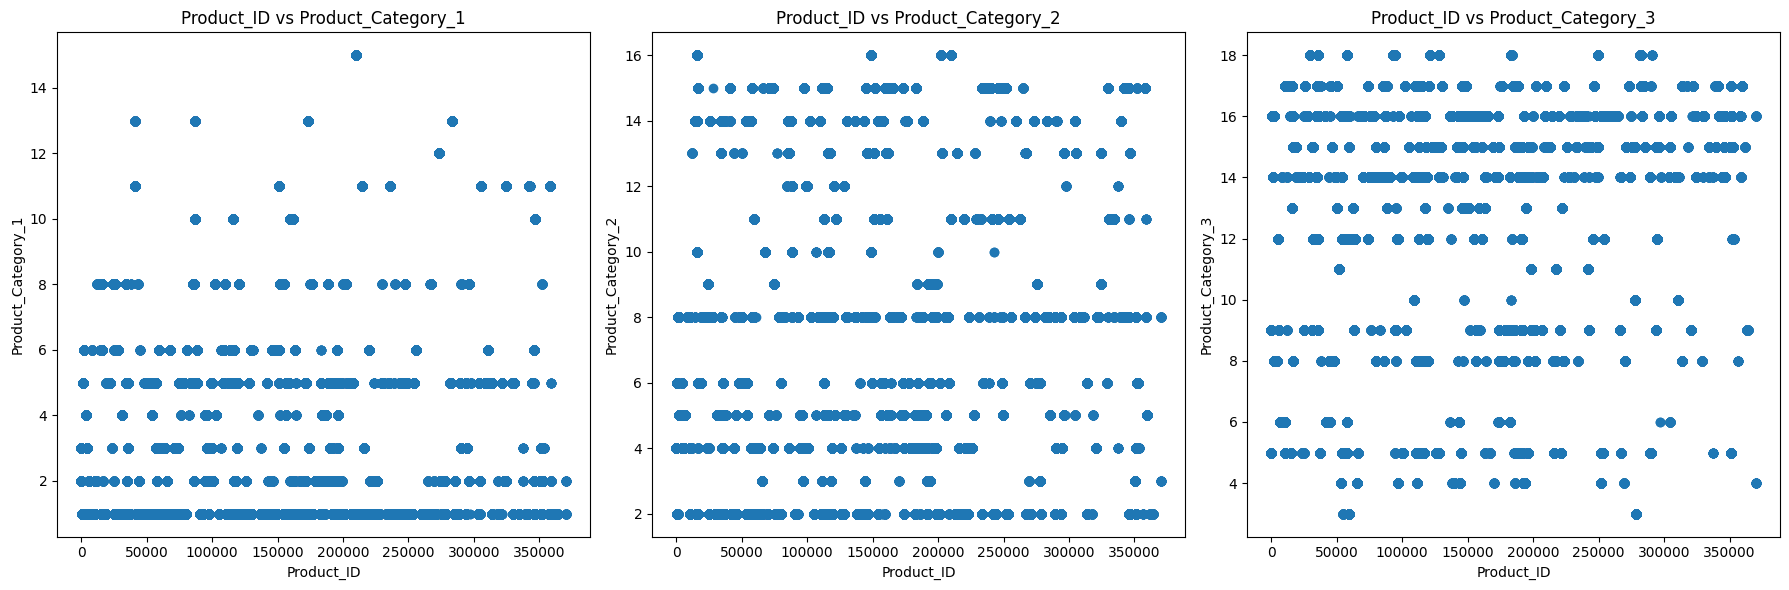

In [11]:
# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Product_ID vs Product_Category_1
axes[0].scatter(df['Product_ID'], df['Product_Category_1'])
axes[0].set_title('Product_ID vs Product_Category_1')
axes[0].set_xlabel('Product_ID')
axes[0].set_ylabel('Product_Category_1')

# Scatter plot for Product_ID vs Product_Category_2
axes[1].scatter(df['Product_ID'], df['Product_Category_2'])
axes[1].set_title('Product_ID vs Product_Category_2')
axes[1].set_xlabel('Product_ID')
axes[1].set_ylabel('Product_Category_2')

# Scatter plot for Product_ID vs Product_Category_3
axes[2].scatter(df['Product_ID'], df['Product_Category_3'])
axes[2].set_title('Product_ID vs Product_Category_3')
axes[2].set_xlabel('Product_ID')
axes[2].set_ylabel('Product_Category_3')

# Display the plots
plt.tight_layout()
plt.show()

In [12]:
X = df.sample(n=50000,random_state=25)

### K-Means Clustering

In order to segment the customers, let's start by randomly assigning them to 'n' clusters.  Thereafter, each customer is reassigned to another cluster that it is closer to, and this process is repeated until no more improvements are possible.  This method is known as **K-Means Clustering**.

In [13]:
# Build k-Means Clustering model

from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=3, random_state=1)
mdlKmcRtc.fit(X)
kMeans_labels = mdlKmcRtc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Since we don't have a ground-truth to calculate an accuracy score (like we did in Supervised Learning), we will need to measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation).  This is known as the **Silhouette Score**. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [14]:
# Evaluate quality of clusters
from sklearn.metrics import silhouette_score

silhouette_score(X, mdlKmcRtc.labels_)

0.5576743252416547

In [15]:
# Function for K-means Clustering
def cluster_kMeans(X, k):
    mdlKmcRtc = KMeans(n_clusters=k, random_state=1)
    mdlKmcRtc.fit(X)
    kMeans_labels = mdlKmcRtc.labels_
    kMeans_sil_score = silhouette_score(X, mdlKmcRtc.labels_)
    return (kMeans_labels, kMeans_sil_score)

In [16]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    kMeans_labels, kMeans_sil_score = cluster_kMeans(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', kMeans_sil_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  2 		 Silhouette Score:  0.6018705008419347


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  3 		 Silhouette Score:  0.5576743252416547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  4 		 Silhouette Score:  0.5777393535959047


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  5 		 Silhouette Score:  0.5630065162705077


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  6 		 Silhouette Score:  0.5456655553112331


The best cluster size seems to be '2' at which the Silhouette Score is 0.60.

Let's see if we can improve the customer segmentation by starting with each customer in its own cluster and then *Hierarchically* grouping them together... (This is only possible when the dataset is small)

### DBScan Clustering and Anomaly Detection

DBScan stands for Density-Based Spatial Clustering of Applications with Noise.  Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

In [17]:
# Build DBScan model

from sklearn.cluster import DBSCAN

mdlDbsRtc = DBSCAN(eps=0.2)
mdlDbsRtc.fit(X)
dbscan_labels = mdlDbsRtc.labels_

In [18]:
# Build DBScan model

from sklearn.cluster import DBSCAN

# Try a smaller eps value to encourage more clusters
mdlDbsRtc = DBSCAN(eps=0.1)
mdlDbsRtc.fit(X)
dbscan_labels = mdlDbsRtc.labels_

# Check the number of unique labels (excluding noise, -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters:", n_clusters)

if n_clusters >= 2:
    from sklearn.metrics import silhouette_score
    score = silhouette_score(X, dbscan_labels)
    print("Silhouette Score:", score)
else:
    print("Not enough clusters to calculate Silhouette Score.")

Number of clusters: 0
Not enough clusters to calculate Silhouette Score.


In [19]:
# calculate number of clusters
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_clusters

0

In [20]:
# calculate number of anomalies
dbscan_anomalies = list(dbscan_labels).count(-1)
dbscan_anomalies

50000

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the DBSCAN clustering function
def cluster_dbscan(X, eps):
    # Initialize and fit the DBSCAN model
    mdlDbsRtc = DBSCAN(eps=eps)
    mdlDbsRtc.fit(X)

    # Get the labels assigned by DBSCAN
    dbscan_labels = mdlDbsRtc.labels_

    # Count the number of clusters and noise points
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    # Calculate the silhouette score only if there are at least 2 clusters
    if n_clusters > 1:
        dbscan_sil_score = silhouette_score(X, dbscan_labels)
    else:
        dbscan_sil_score = -1  # Assign a placeholder value for invalid silhouette score

    return n_clusters, n_noise, dbscan_sil_score


# Test DBSCAN with different eps values
for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(X, eps)
    if dbscan_clusters >= 2:  # Check for sufficient clusters before printing silhouette score
        print('eps: ', eps, '\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)
    else:
        print('eps: ', eps, '\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: Not applicable (insufficient clusters)')


eps:  0.1 	 Clusters:  0 	 Noise:  50000 	 Silhouette Score: Not applicable (insufficient clusters)
eps:  0.2 	 Clusters:  0 	 Noise:  50000 	 Silhouette Score: Not applicable (insufficient clusters)
eps:  0.3 	 Clusters:  0 	 Noise:  50000 	 Silhouette Score: Not applicable (insufficient clusters)
eps:  0.4 	 Clusters:  0 	 Noise:  50000 	 Silhouette Score: Not applicable (insufficient clusters)
eps:  0.5 	 Clusters:  0 	 Noise:  50000 	 Silhouette Score: Not applicable (insufficient clusters)
eps:  0.6 	 Clusters:  0 	 Noise:  50000 	 Silhouette Score: Not applicable (insufficient clusters)
eps:  0.7 	 Clusters:  0 	 Noise:  50000 	 Silhouette Score: Not applicable (insufficient clusters)


# Task 7

## Prepare Data

In order to extract relationships between items, the data is first rearranged into a binary table where each transaction is a row, each column is an item, and the values are set to 1 if the item was part of the transaction.

## Build Model

### Association Rule Mining

Suppose we are interested in the relationship A -> B.  Then:

* **Support**: Fraction of transactions that contain both A and B = Freq(A,B)

* **Confidence**: How often B appears given A appeared = Support / Freq(A)

* **Lift**: Confidence given B appeared = Confidence / Freq(B)

In [22]:
df.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C
1,1000001,248942,1,10,2,0,1,6.0,14.0,15200,0.0,0.0,0.0
6,1000004,184942,5,7,2,1,1,8.0,17.0,19215,1.0,1.0,0.0
13,1000005,145042,3,20,1,1,1,2.0,5.0,15665,1.0,0.0,0.0
14,1000006,231342,6,9,1,0,5,8.0,14.0,5378,0.0,0.0,0.0
16,1000006,96642,6,9,1,0,2,3.0,4.0,13055,0.0,0.0,0.0


In [23]:
%%time
# Determine the items and itemsets with at least 1% support (generates all itemsets and then filters by support)

from mlxtend.frequent_patterns import apriori
import pandas as pd

# Assuming 'df' is your original DataFrame with numerical values
# Create a new DataFrame 'basket' with boolean values
basket = df.applymap(lambda x: True if x > 0 else False)

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

       support                                           itemsets
0     1.000000                                          (User_ID)
1     1.000000                                       (Product_ID)
2     1.000000                                              (Age)
3     0.874290                                       (Occupation)
4     0.865790                       (Stay_In_Current_City_Years)
...        ...                                                ...
6138  0.082214  (User_ID, City_Category_C, Product_Category_1,...
6139  0.102571  (Product_Category_1, Occupation, Purchase, Gen...
6140  0.082214  (City_Category_C, Product_Category_1, Occupati...
6141  0.102571  (User_ID, Product_Category_1, Occupation, Purc...
6142  0.082214  (User_ID, City_Category_C, Product_Category_1,...

[6143 rows x 2 columns]
CPU times: user 4.2 s, sys: 3.39 s, total: 7.59 s
Wall time: 7.75 s


In [24]:
!pip3 install mlxtend --upgrade

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
%%time
# Speed up by using pattern fragment growth method for mining frequent itemsets (uses density to find good itemsets)

from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 2.95 s, sys: 12.5 ms, total: 2.96 s
Wall time: 4.27 s


,support,itemsets
0,1.000000,(Purchase)
1,1.000000,(Product_Category_3)
2,1.000000,(Product_Category_2)
3,1.000000,(Product_Category_1)
4,1.000000,(Age)
...,...,...
6138,0.082214,"(User_ID, City_Category_C, Occupation, Purchas..."
6139,0.082214,"(User_ID, City_Category_C, Product_Category_1,..."
6140,0.082214,"(User_ID, City_Category_C, Product_Category_1,..."
6141,0.082214,"(User_ID, City_Category_C, Product_Category_1,..."


In [28]:
# Evaluate the metrics, and filter the items and itemsets that have at least 70% confidence

from mlxtend.frequent_patterns import association_rules

a_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
a_rules.sort_values(by=['confidence'],ascending=False,inplace=True)
a_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Product_Category_3),(Purchase),1.000000,1.0,1.000000,1.0,1.0,0.0,inf,0.0
142350,"(Product_Category_1, Product_Category_3, Marit...","(Product_ID, User_ID, Purchase)",0.168876,1.0,0.168876,1.0,1.0,0.0,inf,0.0
142344,"(User_ID, Product_Category_3, Marital_Status, ...","(Product_ID, Product_Category_1, Purchase)",0.168876,1.0,0.168876,1.0,1.0,0.0,inf,0.0
142345,"(Product_Category_1, Purchase, Product_ID, Mar...","(Product_Category_3, User_ID, Age)",0.168876,1.0,0.168876,1.0,1.0,0.0,inf,0.0
142346,"(Product_Category_1, Purchase, Product_Categor...","(Product_ID, User_ID, Age)",0.168876,1.0,0.168876,1.0,1.0,0.0,inf,0.0
